# 感知机学习算法原始形式

迭代次数	误分类点		w		b
1 		 x1 		 [[ 3.  3.]] 		 1
2 		 x3 		 [[ 2.  2.]] 		 0
3 		 x3 		 [[ 1.  1.]] 		 -1
4 		 x3 		 [[ 0.  0.]] 		 -2
5 		 x1 		 [[ 3.  3.]] 		 -1
6 		 x3 		 [[ 2.  2.]] 		 -2
7 		 x3 		 [[ 1.  1.]] 		 -3


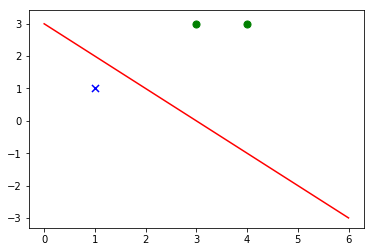

In [2]:
import random
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

def preception_train(X, y, lr = 1):
    X_size = X.shape[0] #训练集大小
    w = np.zeros([X.shape[1],1]) #初始化w
    b = 0 #初始化b
    iter_count = 0 #迭代次数
    print('迭代次数\t误分类点\t\tw\t\tb')
    while(True):
        cnt = 0 #已处理点的数量 
        for i in range(X_size):
            if y[i]*(np.dot(w.T,X[i])+b)<=0: # 误分类点
                #更新w和b
                w += lr*y[i]*X[i].reshape(w.shape)
                b += lr*y[i]
                print(iter_count+1,'\t\t','x'+str(i+1),'\t\t',w.T, '\t\t', b)
                iter_count+=1
                break
            cnt+=1
        if cnt == X_size:
            break
    return w,b

def plot_points(X, y, w, b):
    # 绘制图像
    plt.figure()
    x1 = np.linspace(0, 6, 100)
    x2 = (-b - w[0]*x1)/w[1]
    plt.plot(x1, x2,color='r',)
    for i in range(len(X)):
        if (y[i] == 1):
            plt.scatter(X[i][0],X[i][1],marker='o',color='g',s = 50)
        else:
            plt.scatter(X[i][0],X[i][1],marker='x',color='b',s = 50)

if __name__ == '__main__':
    X = [[3,3],[4,3],[1,1]]  
    X = np.array(X)
    y = [1,1,-1]
    y = np.array(y)
    lr = 1 #学习率
    w, b = preception_train(X,y,lr)
    plot_points(X,y,w,b)

# 感知机学习算法对偶形式

迭代次数	误分类点	alpha		b
1 		 x1 		 [1, 0, 0] 	 1
2 		 x3 		 [1, 0, 1] 	 0
3 		 x3 		 [1, 0, 2] 	 -1
4 		 x3 		 [1, 0, 3] 	 -2
5 		 x1 		 [2, 0, 3] 	 -1
6 		 x3 		 [2, 0, 4] 	 -2
7 		 x3 		 [2, 0, 5] 	 -3


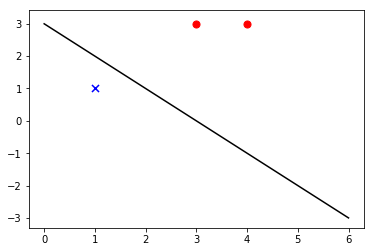

In [1]:
import random
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

def preception_antithesis_train(X, y, lr = 1):
    X_size = X.shape[0] #训练集大小
    alpha = [0 for i in range(X_size)] #初始化w
    w = np.zeros([X.shape[1],1]) #初始化w
    b = 0 #初始化b
    gram = np.matmul(X, X.T) #计算gram矩阵
    
    iter_count = 0 #迭代次数
    print('迭代次数\t误分类点\talpha\t\tb')
    while(True):
        cnt = 0 #已处理点的数量 
        for i in range(X_size):
            temp = 0
            for j in range(X_size):
                temp += alpha[j]*y[j]*gram[i][j]
            temp += b
            if y[i]*temp <=0: # 误分类点
                #更新alpha[i]和b
                alpha[i] += lr
                b += lr*y[i]
                print(iter_count+1,'\t\t','x'+str(i+1),'\t\t',alpha, '\t', b)
                iter_count+=1
                break
            cnt+=1
        if cnt == X_size:
            break
    for i in range(X.shape[0]):
        for j in range(X.shape[1]):
            w[j] += alpha[i]*y[i]*X[i][j]
    return w,b

def plot_points(X, y, w, b):
    # 绘制图像
    plt.figure()
    x1 = np.linspace(0, 6, 100)
    x2 = (-b - w[0]*x1)/w[1]
    plt.plot(x1, x2,color='black',)
    for i in range(len(X)):
        if (y[i] == 1):
            plt.scatter(X[i][0],X[i][1],marker='o',color='r',s = 50)
        else:
            plt.scatter(X[i][0],X[i][1],marker='x',color='b',s = 50)

if __name__ == '__main__':
    X = [[3,3],[4,3],[1,1]]  
    X = np.array(X)
    y = [1,1,-1]
    y = np.array(y)
    lr = 1 #学习率
    w, b = preception_antithesis_train(X,y,lr)
    plot_points(X,y,w,b)